<a href="https://colab.research.google.com/github/fabricejumel/darknet_collab/blob/main/test_darknet_robia_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1er étape:
Vérifier la carte graphique utilisé par votre google collab (si pas de carte graphique,changer le mode d'execution en GPU dans l'onglet execution) On repere par exemple ici qu'il s'agit d'une Tesla K80.

https://arnon.dk/matching-sm-architectures-arch-and-gencode-for-various-nvidia-cards/


 Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+

In [3]:
!nvidia-smi

Wed Oct 20 07:19:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWie1MLYwCIfVnclcR0XWNnQ3egH2b1Q5fPiQ8WHiWozRKIPQvKhKvg
Mounted at /content/gdrive


In [5]:
#!cd /content/gdrive/MyDrive/darknet/
!ln -s /content/gdrive/MyDrive/darknet/darknet /darknet
#!ln -s /content/gdrive/MyDrive/darknet/ /darknet
#!cd /darknet

In [10]:
%cd /darknet
!ls


/content/gdrive/MyDrive/darknet/darknet
 3rdparty		  Makefile
 appveyor.yml		  net_cam_v3.sh
 backup			  obj
 bad.list		  output.avi
 build			  output_vf_tinyyolo.avi
 build.ps1		  predictions.jpg
 build.sh		  predictions_ycb_tiny_100_sugar41.jpg
 cfg			  predictions_ycb_tiny_9000.jpg
 chart.png		  predictions_ycb_tiny_9000_sugar93.jpg
 cmake			  __pycache__
 CMakeLists.txt		  README.md
 CMakeSettings.json	  results
 darknet		  scripts
 darknet53.conv.74	  src
 DarknetConfig.cmake.in   test50.mp4
 darknet.py		  traindata
 darknet_video.py	  uselib
 data			  video_v2.sh
 Dataset_YCB		  video_yolov3.sh
'Dataset _YCB.tar.xz'	  ycb.data
'Dataset _YCB.zip'	  ycb-test.jpg
 image_yolov2.sh	  yolov3-tiny.conv.15
 image_yolov3.sh	  yolov3-tiny.weights
 include		  yolov3.weights
 json_mjpeg_streams.sh	  YOLOV3-YCB_normal
 libdarknet.so		  YOLOV3-YCB_normal.tar.xz
 LICENSE		  YOLOV3_YCB_tiny


In [12]:
!make

chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http

In [ ]:
!ln -s '/content/gdrive/My Drive/darknet/darknet' /darknet 

ln: failed to create symbolic link '/darknet/darknet': File exists


In [ ]:
!ls -l /darknet/backup


total 340000
-rw------- 1 root root 34815876 Nov  4 00:40 yolov3-tiny-ycb-training_1000.weights
-rw------- 1 root root 34815876 Nov  4 01:13 yolov3-tiny-ycb-training_2000.weights
-rw------- 1 root root 34815876 Nov  4 01:44 yolov3-tiny-ycb-training_3000.weights
-rw------- 1 root root 34815876 Nov  4 02:15 yolov3-tiny-ycb-training_4000.weights
-rw------- 1 root root 34815876 Nov  4 02:49 yolov3-tiny-ycb-training_5000.weights
-rw------- 1 root root 34815876 Nov  4 03:24 yolov3-tiny-ycb-training_6000.weights
-rw------- 1 root root 34815876 Nov  4 03:58 yolov3-tiny-ycb-training_7000.weights
-rw------- 1 root root 34815876 Nov  4 04:31 yolov3-tiny-ycb-training_8000.weights
-rw------- 1 root root 34815876 Nov  4 05:06 yolov3-tiny-ycb-training_9000.weights
-rw------- 1 root root 34815876 Nov  4 06:34 yolov3-tiny-ycb.weights


In [ ]:
!python darknet_video.py

 Try to load cfg: ./cfg/yolov3.cfg, weights: ./yolov3.weights, clear = 0 
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv 

In [ ]:
!ls

ls: cannot open directory '.': Transport endpoint is not connected


In [ ]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

*** 3 Results, color coded by confidence ***
dog: 100.0%
bicycle: 99.0%
truck: 94.0%


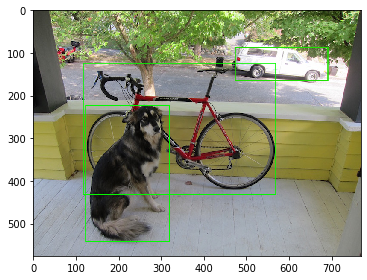

{'detections': [('dog', 0.9978053569793701, (221.8568115234375, 383.3585205078125, 196.35794067382812, 319.61614990234375)), ('bicycle', 0.98981773853302, (343.3912048339844, 278.4803161621094, 451.79229736328125, 308.5257873535156)), ('truck', 0.9374105334281921, (582.4186401367188, 126.84037017822266, 217.31100463867188, 78.69580078125))], 'image': array([[[ 57,  58,  50],
        [ 58,  59,  51],
        [ 60,  61,  53],
        ...,
        [143,  89,  43],
        [ 89,  49,  41],
        [ 65,  70,  47]],

       [[ 58,  59,  51],
        [ 58,  59,  51],
        [ 59,  60,  52],
        ...,
        [124,  75,  35],
        [ 84,  50,  41],
        [ 58,  70,  46]],

       [[ 58,  59,  51],
        [ 58,  59,  51],
        [ 59,  60,  52],
        ...,
        [ 98,  54,  25],
        [ 78,  53,  48],
        [ 44,  63,  41]],

       ...,

       [[160, 168, 179],
        [160, 168, 179],
        [163, 171, 182],
        ...,
        [ 80,  64,  64],
        [ 53,  39,  36],
 

In [13]:
import darknet
print(darknet.performDetect())

In [ ]:
#!./darknet detector train  ycb.data  /darknet/YOLOV3_YCB_tiny/yolov3-tiny-ycb-training.cfg yolov3-tiny.conv.15 -dont_show

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

 7397: 1.335574, 1.307182 avg loss, 0.001000 rate, 1.169359 seconds, 473408 images
Loaded: 0.093926 seconds

 7398: 1.139808, 1.290444 avg loss, 0.001000 rate, 1.184557 seconds, 473472 images
Loaded: 0.048038 seconds

 7399: 1.299644, 1.291364 avg loss, 0.001000 rate, 1.136935 seconds, 473536 images
Loaded: 0.102052 seconds

 7400: 1.479282, 1.310156 avg loss, 0.001000 rate, 1.136147 seconds, 473600 images
Saving weights to backup//yolov3-tiny-ycb-training_last.weights
Resizing
672 x 672 
 try to allocate additional workspace_size = 147.22 MB 
 CUDA allocate done! 
Loaded: 0.316719 seconds

 7401: 1.356947, 1.314835 avg loss, 0.001000 rate, 1.668183 seconds, 473664 images
Loaded: 0.000044 seconds

 7402: 1.018733, 1.285225 avg loss, 0.001000 rate, 1.656627 seconds, 473728 images
Loaded: 0.000041 seconds

 7403: 1.153722, 1.272074 avg loss, 0.001000 rate, 1.644537 seconds, 473792 images
Loaded: 0.000040 secon

In [ ]:
#!./darknet detector test ./cfg/coco.data ./cfg/yolov3.cfg ./yolov3.weights data/dog.jpg -i 0 -thresh 0.25
#!./darknet detector test ycb.data /darknet/YOLOV3_YCB_tiny/yolov3-tiny-ycb.cfg /darknet/backup/yolov3-tiny-ycb-training_1000.weights ycb-test.jpg -i 0 -thresh 0.01
#!./darknet detector test ycb.data /darknet/YOLOV3_YCB_tiny/yolov3-tiny-ycb.cfg ./backup/yolov3-tiny-ycb.weights ycb-test.jpg -i 0 -thresh 0.25

#!./darknet detector train  ycb.data  /darknet/YOLOV3_YCB_tiny/yolov3-tiny-ycb-training.cfg yolov3-tiny.conv.15 -dont_show
!./darknet detector train  ycb.data  /darknet/YOLOV3_YCB_tiny/yolov3-tiny-ycb-training.cfg backup/yolov3-tiny-ycb-training_9000.weights -dont_show


yolov3-tiny-ycb-training
layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   640 x 640 x   3   ->   640 x 640 x  16 0.354 BF
   1 max          2 x 2 / 2   640 x 640 x  16   ->   320 x 320 x  16 0.007 BF
   2 conv     32  3 x 3 / 1   320 x 320 x  16   ->   320 x 320 x  32 0.944 BF
   3 max          2 x 2 / 2   320 x 320 x  32   ->   160 x 160 x  32 0.003 BF
   4 conv     64  3 x 3 / 1   160 x 160 x  32   ->   160 x 160 x  64 0.944 BF
   5 max          2 x 2 / 2   160 x 160 x  64   ->    80 x  80 x  64 0.002 BF
   6 conv    128  3 x 3 / 1    80 x  80 x  64   ->    80 x  80 x 128 0.944 BF
   7 max          2 x 2 / 2    80 x  80 x 128   ->    40 x  40 x 128 0.001 BF
   8 conv    256  3 x 3 / 1    40 x  40 x 128   ->    40 x  40 x 256 0.944 BF
   9 max          2 x 2 / 2    40 x  40 x 256   ->    20 x  20 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    20 x  20 x 256   ->    20 x  20 x 512 0.944 BF
  11 max          2 x 2 / 1    20 x  20 x 512   ->

In [21]:
%cd ..

/content/gdrive/MyDrive/darknet/darknet


In [15]:
!ls

 3rdparty		  Makefile
 appveyor.yml		  net_cam_v3.sh
 backup			  obj
 bad.list		  output.avi
 build			  output_vf_tinyyolo.avi
 build.ps1		  predictions.jpg
 build.sh		  predictions_ycb_tiny_100_sugar41.jpg
 cfg			  predictions_ycb_tiny_9000.jpg
 chart.png		  predictions_ycb_tiny_9000_sugar93.jpg
 cmake			  __pycache__
 CMakeLists.txt		  README.md
 CMakeSettings.json	  results
 darknet		  scripts
 darknet53.conv.74	  src
 DarknetConfig.cmake.in   test50.mp4
 darknet.py		  traindata
 darknet_video.py	  uselib
 data			  video_v2.sh
 Dataset_YCB		  video_yolov3.sh
'Dataset _YCB.tar.xz'	  ycb.data
'Dataset _YCB.zip'	  ycb-test.jpg
 image_yolov2.sh	  yolov3-tiny.conv.15
 image_yolov3.sh	  yolov3-tiny.weights
 include		  yolov3.weights
 json_mjpeg_streams.sh	  YOLOV3-YCB_normal
 libdarknet.so		  YOLOV3-YCB_normal.tar.xz
 LICENSE		  YOLOV3_YCB_tiny


In [18]:
%cd backup

/content/gdrive/My Drive/darknet/darknet/backup


In [19]:
!ls

yolov3-tiny-ycb-training_1000.weights  yolov3-tiny-ycb-training_6000.weights
yolov3-tiny-ycb-training_2000.weights  yolov3-tiny-ycb-training_7000.weights
yolov3-tiny-ycb-training_3000.weights  yolov3-tiny-ycb-training_8000.weights
yolov3-tiny-ycb-training_4000.weights  yolov3-tiny-ycb-training_9000.weights
yolov3-tiny-ycb-training_5000.weights  yolov3-tiny-ycb.weights
